<h1 align='center'>Detecting forged banknotes</h1>
<img src='banknotes.jpeg'></img>

<h1>Introduction</h1>

Nowadays banknotes are one of the main tools for people and banks to make transactions. The detection of forged banknotes is essential to avoid frauds and it is an indispensable security mechanism to the banks. In this report we intend to create an analysis which will help organizations to classify false notes. This work is part of the final project requested by the course <a href='https://www.coursera.org/learn/data-science-k-means-clustering-python'>Foundations of Data Science: K-Means Clustering in Python</a>.


<h1>Description of the data</h1>

We are going to use the Banknote authentication dataset available in https://www.openml.org/d/1462, which has information about the distinguish between real and forged banknotes. All the information were extracted from images taken from genuine and forged banknotes. From the images it was possible to extract two attributes: the variance of wavelet transformed image and the skewness of wavelet transformed image. The full dataset contain data from 1372 notes.

<h1>Methods and results</h1>

Using the two attributes, variance of wavelet and the skewness of wavelet transformed image, we will use a clusterization method in order to classify the dataset into two groups: the genuine and the forged banknotes. We will also calculate some essential metrics, such as the mean and the standard deviation, in order to understand the set of parameters.

In [9]:
import pandas as pd
import numpy as np

In [10]:
data = pd.read_csv("Banknote-authentication-dataset.csv")

In [11]:
V1 = data["V1"]
V2 = data["V2"]

In [12]:
V1_mean = V1.mean()
V2_mean = V2.mean()
V1_std = V1.std()
V2_std = V2.std()

In [13]:
print("Mean of V1 = ", V1_mean, "Mean of V2 = ", V2_mean)

Mean of V1 =  0.43373525728862977 Mean of V2 =  1.9223531209912554


In [14]:
print("Standard deviation of V1 = ", V1_std, "Standard deviation of V2 = ", V2_std)

Standard deviation of V1 =  2.8427625862451675 Standard deviation of V2 =  5.8690467435803795


In the following graph we can visualize the scatter plot of the dataset, considering the skewness of wavelet transformed as a function of the variance of wavelet transformed.

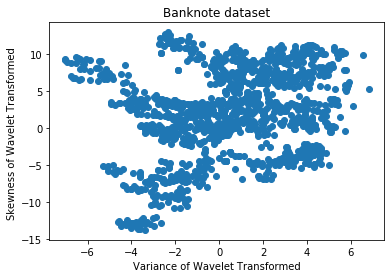

In [18]:
import matplotlib.pyplot as plt

plt.title("Banknote dataset")
plt.xlabel("Variance of Wavelet Transformed")
plt.ylabel("Skewness of Wavelet Transformed ")

plt.scatter(V1, V2)
plt.savefig("figure1.pdf")

plt.show()

In order to visualize some important metrics, we computed on the next figure the mean of each attribute, which gives the central value of the dataset, represented as a black dot on the graph. We also calculated the standard deviation, which provides the dipersion of the considered set, represented as a blue ellipse.

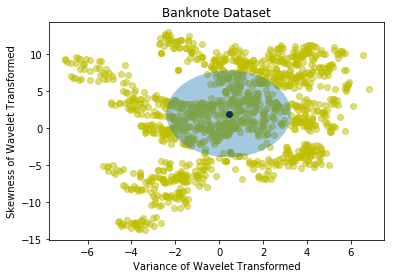

In [40]:
import matplotlib.patches as patches

ellipse = patches.Ellipse([V1_mean, V2_mean], V1_std*2, V2_std*2, alpha = 0.4)
fig, graph = plt.subplots()

graph.scatter(data['V1'], data['V2'], c = 'y', alpha = 0.5)
graph.scatter(V1_mean, V2_mean, c='k')
graph.add_patch(ellipse)
plt.title("Banknote Dataset")
plt.xlabel("Variance of Wavelet Transformed")
plt.ylabel("Skewness of Wavelet Transformed")
plt.savefig("figure2.pdf")

plt.show()

As we can see on figure above, the majority of the data points are far from the mean value, because the standard deviation is high, which indicates that the dots are spread out over the entire range of the values.

The figure below shows the result of the clusterization method applied to the data. In this plot it is possible to identify the red dots, reffering to the centroids of the clusterization procedure, and the two set of colors, yellow and purple, corresponding to the two clusterized groups. The algorithm used successfully split the dataset into one big group, corresponding to the forged banknotes, and to another group, corresponding to genuine banknotes.

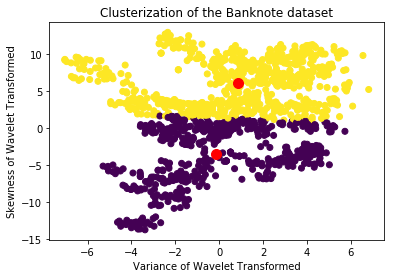

In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

V1_V2 = np.column_stack((V1, V2))

plt.title("Clusterization of the Banknote dataset")
plt.xlabel("Variance of Wavelet Transformed")
plt.ylabel("Skewness of Wavelet Transformed")

km_res = KMeans(n_clusters = 2).fit(V1_V2)

clusters = km_res.cluster_centers_

plt.scatter(V1, V2, c = km_res.labels_.astype(float))
plt.scatter(clusters[:,0], clusters[:,1], s = 100, c = 'r')

plt.savefig("figure3.pdf")

plt.show()

We also tested the stability of the algorithm. We re-runned 6 times (figure below, panels (a) to (f)). Comparing the results we can see that the method is stable, since it gave roughly the same plots. In a very tiny scale one can see very slightly differences on each run, but it is very hard to distinguish between all them.

<img src='panels-a-f.png'></img>

<h1>Summary</h1>

In dataset analysed on this project we could see a clearly spread of values, as we reported on the second figure. However we can not consider the existence of outliers, because of the range of the data in relation to the size of the area corresponding to the standard deviation. It is also possible to see, in the third figure, that the  clusterization method divides the dataset into two big groups, which allows one to identify the real and the forged bancknotes. Running the algorithm 6 times gave roughly the same result. In a very tiny scale one can see very slightly differences on each run, but it is very hard to distinguish between all them. Thus, it is possible to say that the algorithm is stable to detect forged banknotes. 

<h1>Recommendations</h1>

As a final remark, it is possible to explore the dataset available in https://www.openml.org/d/1462, where there is information about more three attributes relative to each note. Using the the entire data, together with a more specific technique, like machine learn, one can increase the accuracy of the identification to forged banknotes.